# Aprendizado de Máquina - Exemplo do K-NN

#### 1 - Importar os módulos necessários e carregar a base de dados de frutas

In [12]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
fruits = pd.read_csv('fruit_data_with_colors.txt', sep='\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


#### 2 - Mapeamento para facilitar a interpretação dos resultados

In [14]:
# criar um mapeamento do valor do rótulo da fruta para o nome da fruta para facilitar a interpretação dos resultados
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique() ))
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

#### 3 - Separando conjuto de treinamento de conjunto de testes

In [15]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

#### 4 - Examinando inicialmente os dados com uma matriz de dispersão

<IPython.core.display.Javascript object>


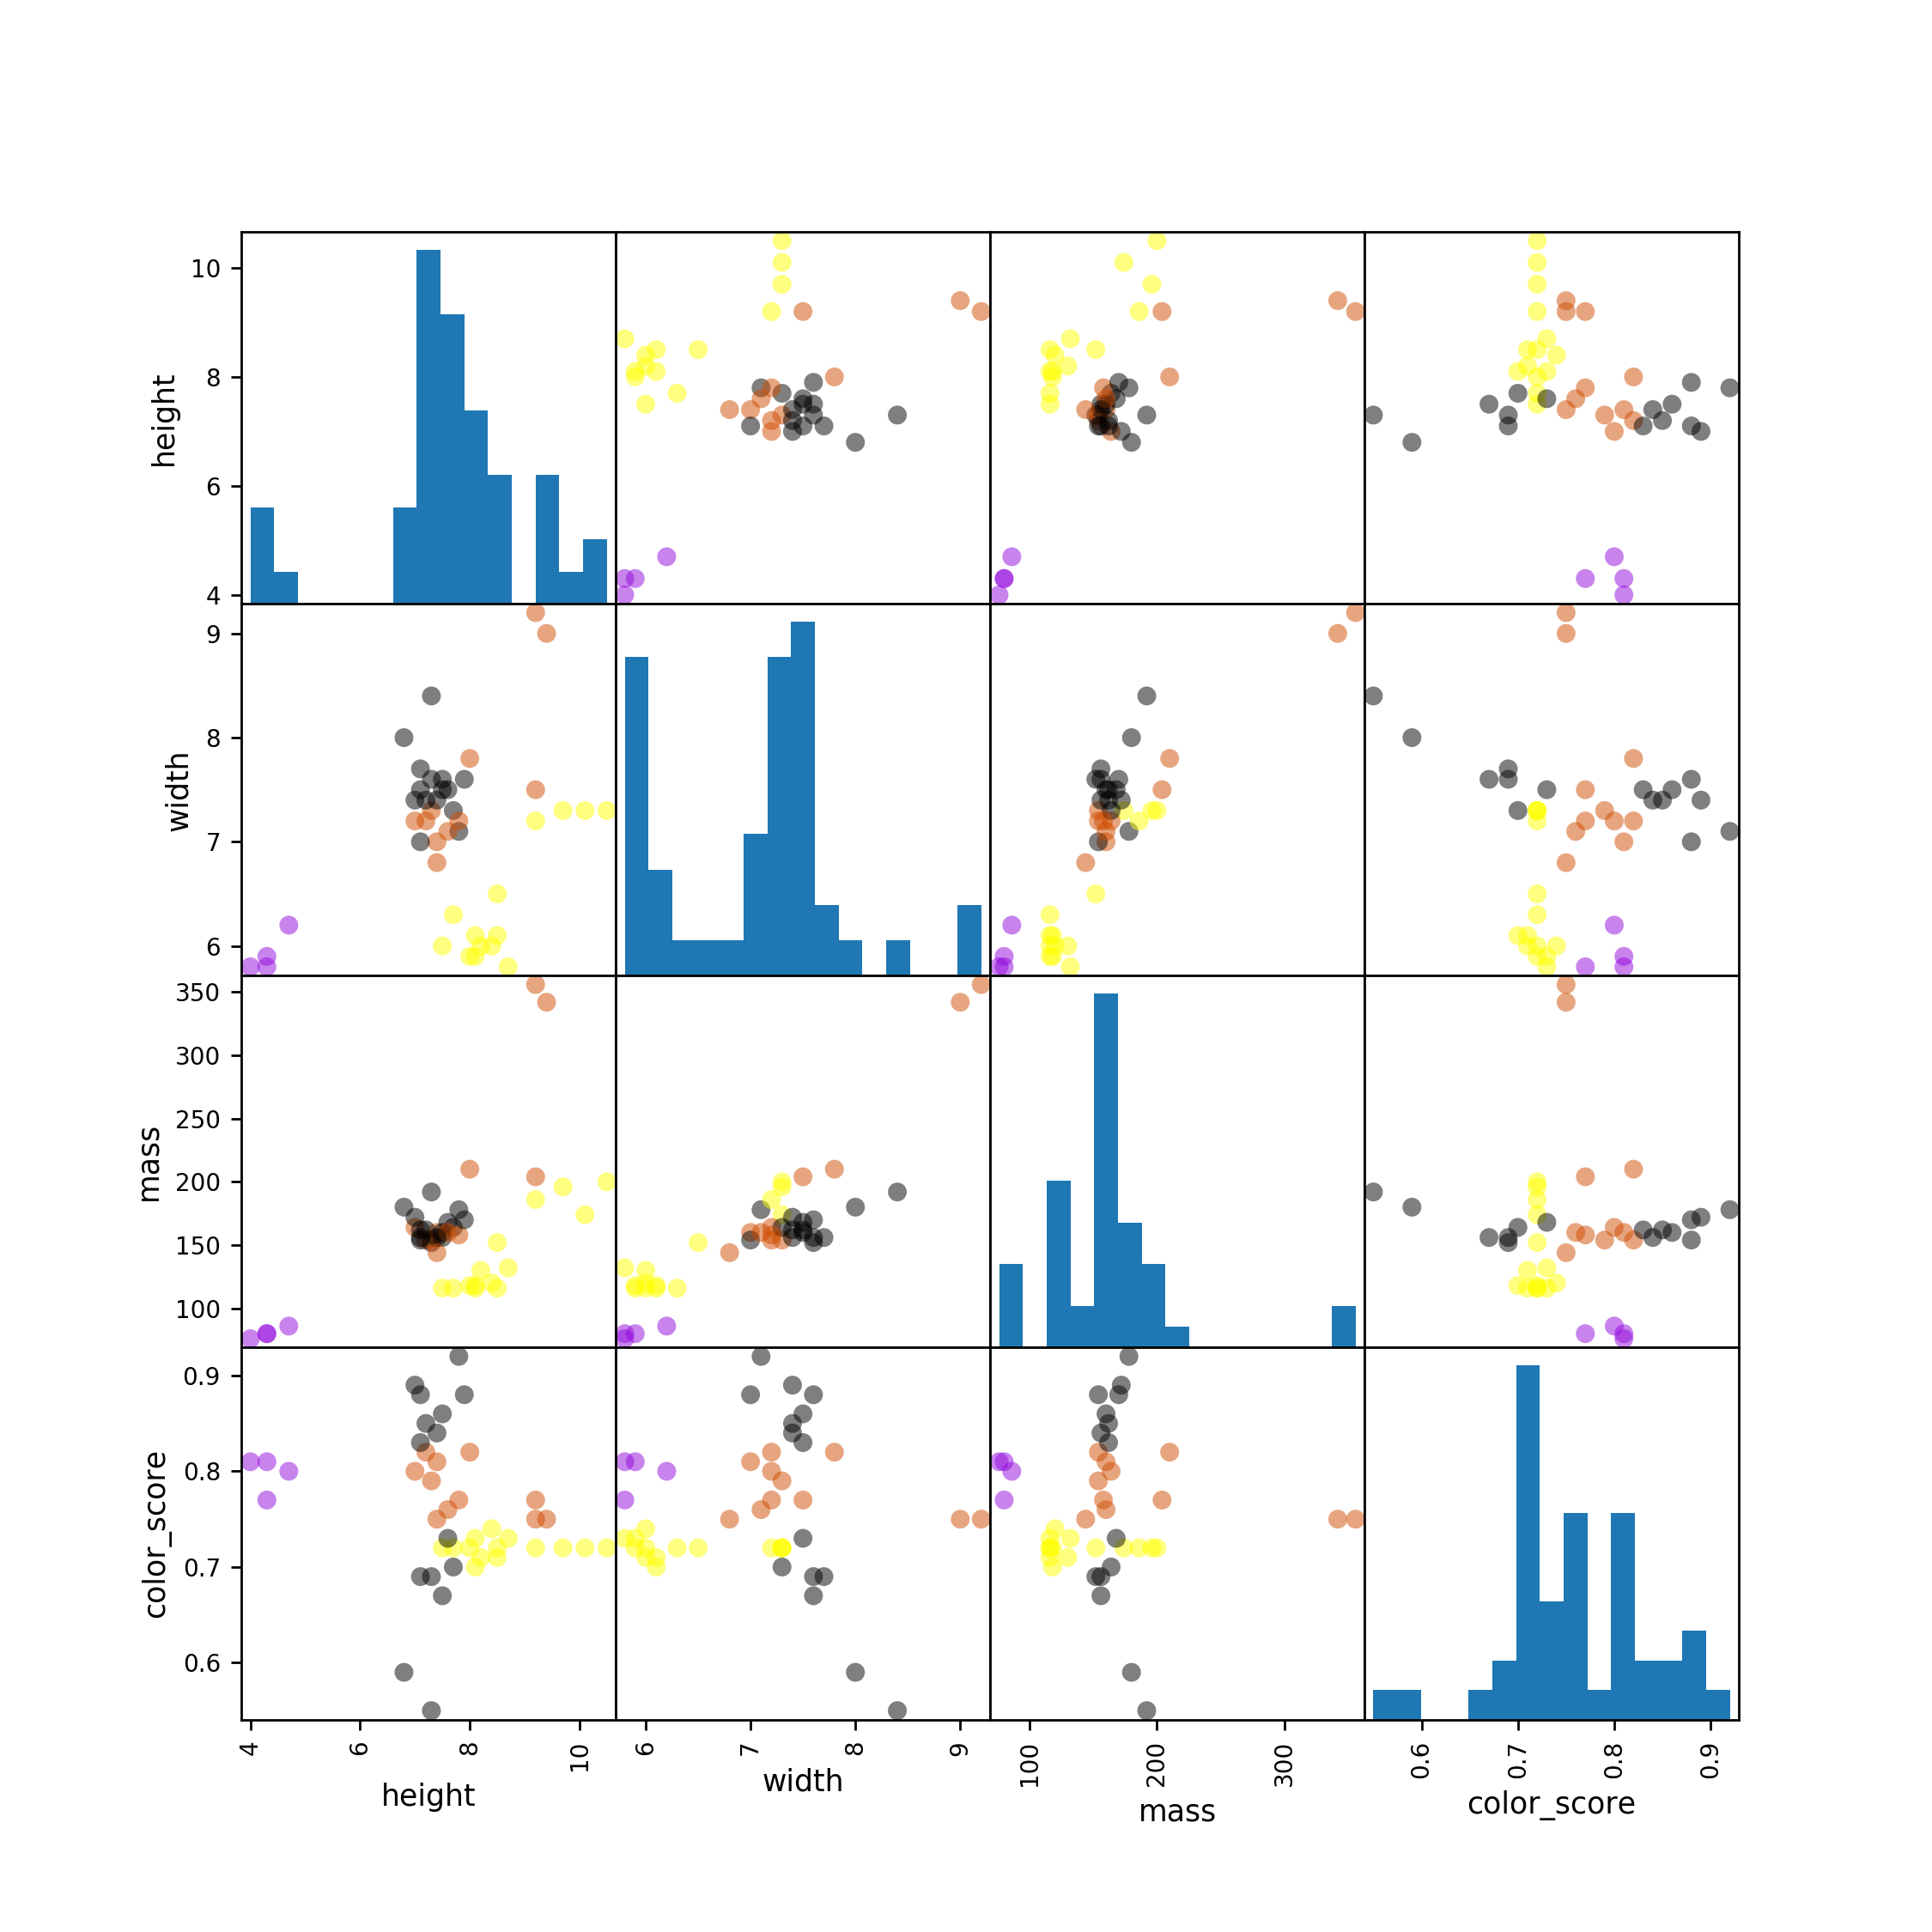

In [16]:
# plotando uma matriz de dispersão ou gráfico de pares de características
from matplotlib import cm

cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c=y_train, marker='o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap )



#### 5 - Gráfico de dispersão 3D

<IPython.core.display.Javascript object>


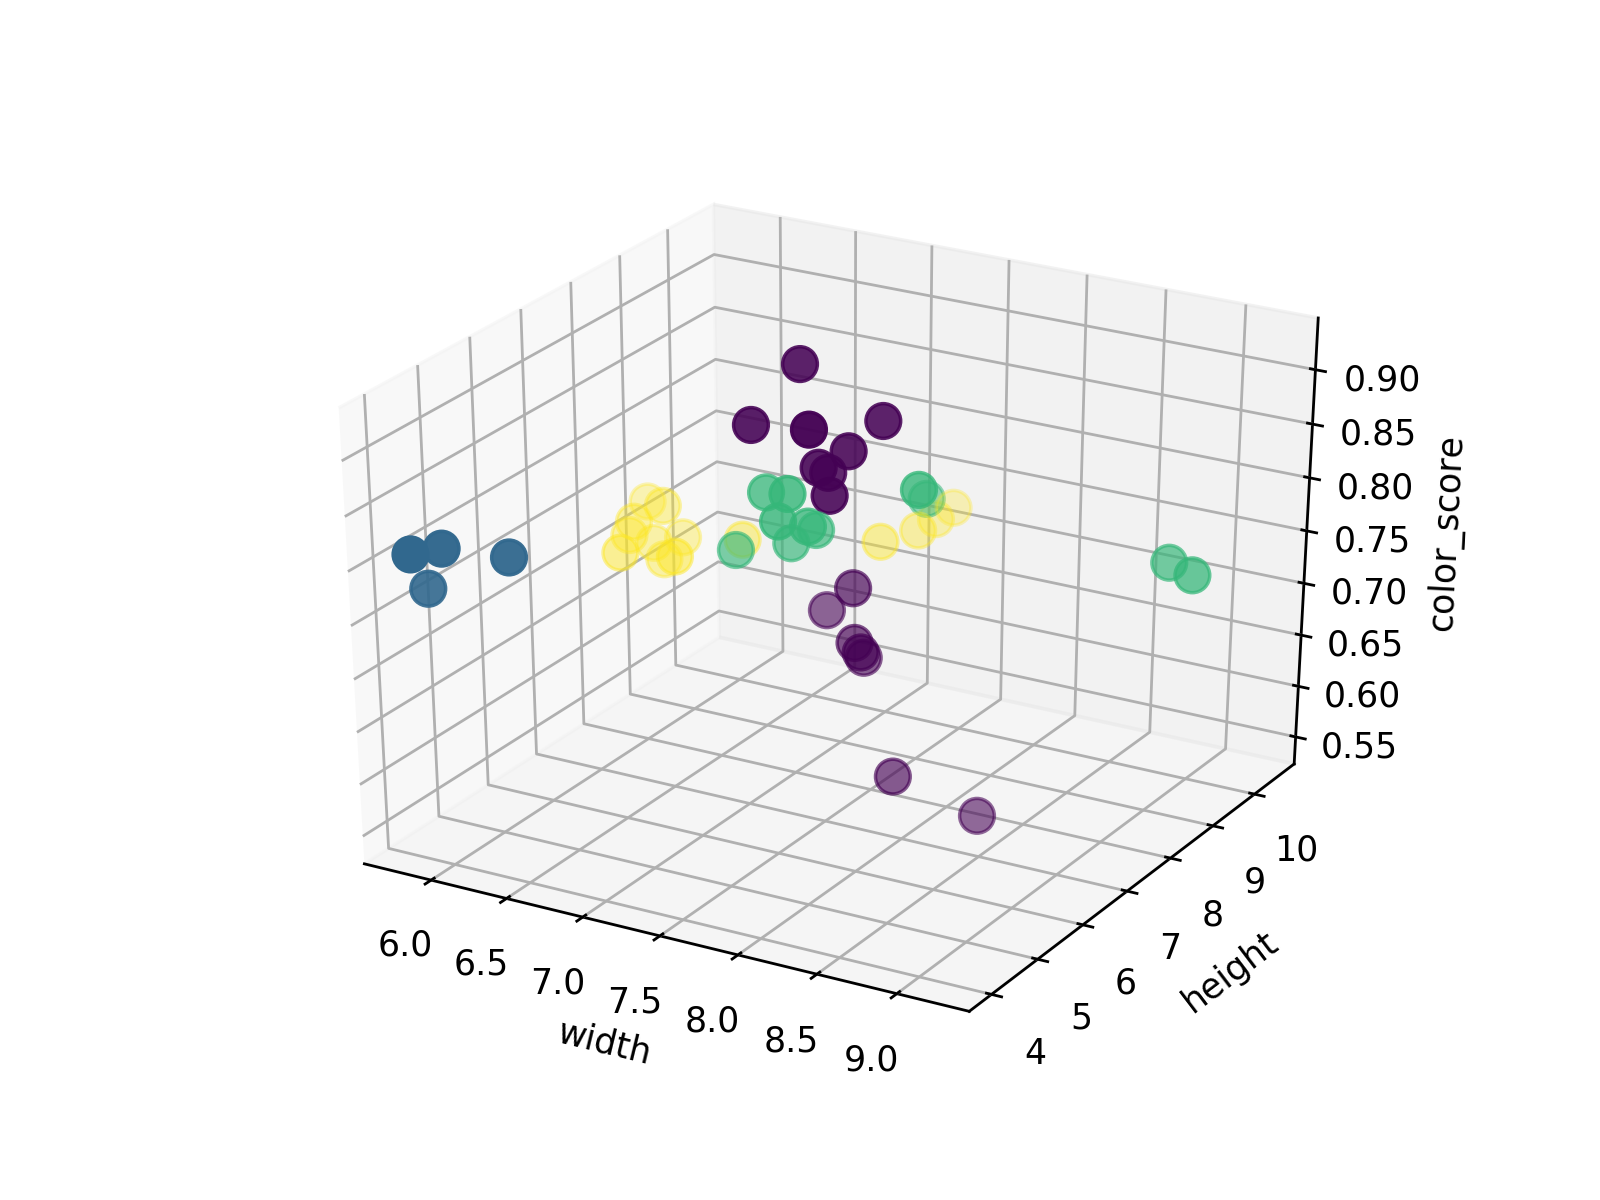

In [17]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

####  6 - Separar (novamente) o conjunto de treinamento do conjunto de testes

In [42]:
X = fruits[['height', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

# 75% / 25% padrão


#### 7 - Cria o objeto Classificador

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)


#### 8 - Treina o classificador usando o conjunto de dados de treinamento

In [44]:
knn.fit(X_train, y_train)
len(X_train)
len(X_test)


15

#### 9 - Estimar a precisão do classificador em dados futuros, usando os dados de teste

In [45]:
knn.score(X_test, y_test)

0.6

#### 10 - Usar o classificador k-NN já treinado para classificar objetos inéditos

In [51]:
# # fruta com massa 20g, largura 4.3 cm e altura 5.5 cm
# fruit_prediction = knn.predict([[20, 4.3, 5.5], [100, 6.3, 8.5]])
# print(fruit_prediction)
# #lookup_fruit_name[fruit_prediction]

In [47]:
# fruta com massa 100g, largura 6.3 cm e altura 8.5 cm
knn.predict?

#### 11 - Plotar os limites de decisão do classificador k-NN

/Users/kizzyterra/Workspace/analise-dados/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/Users/kizzyterra/Workspace/analise-dados/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


<IPython.core.display.Javascript object>


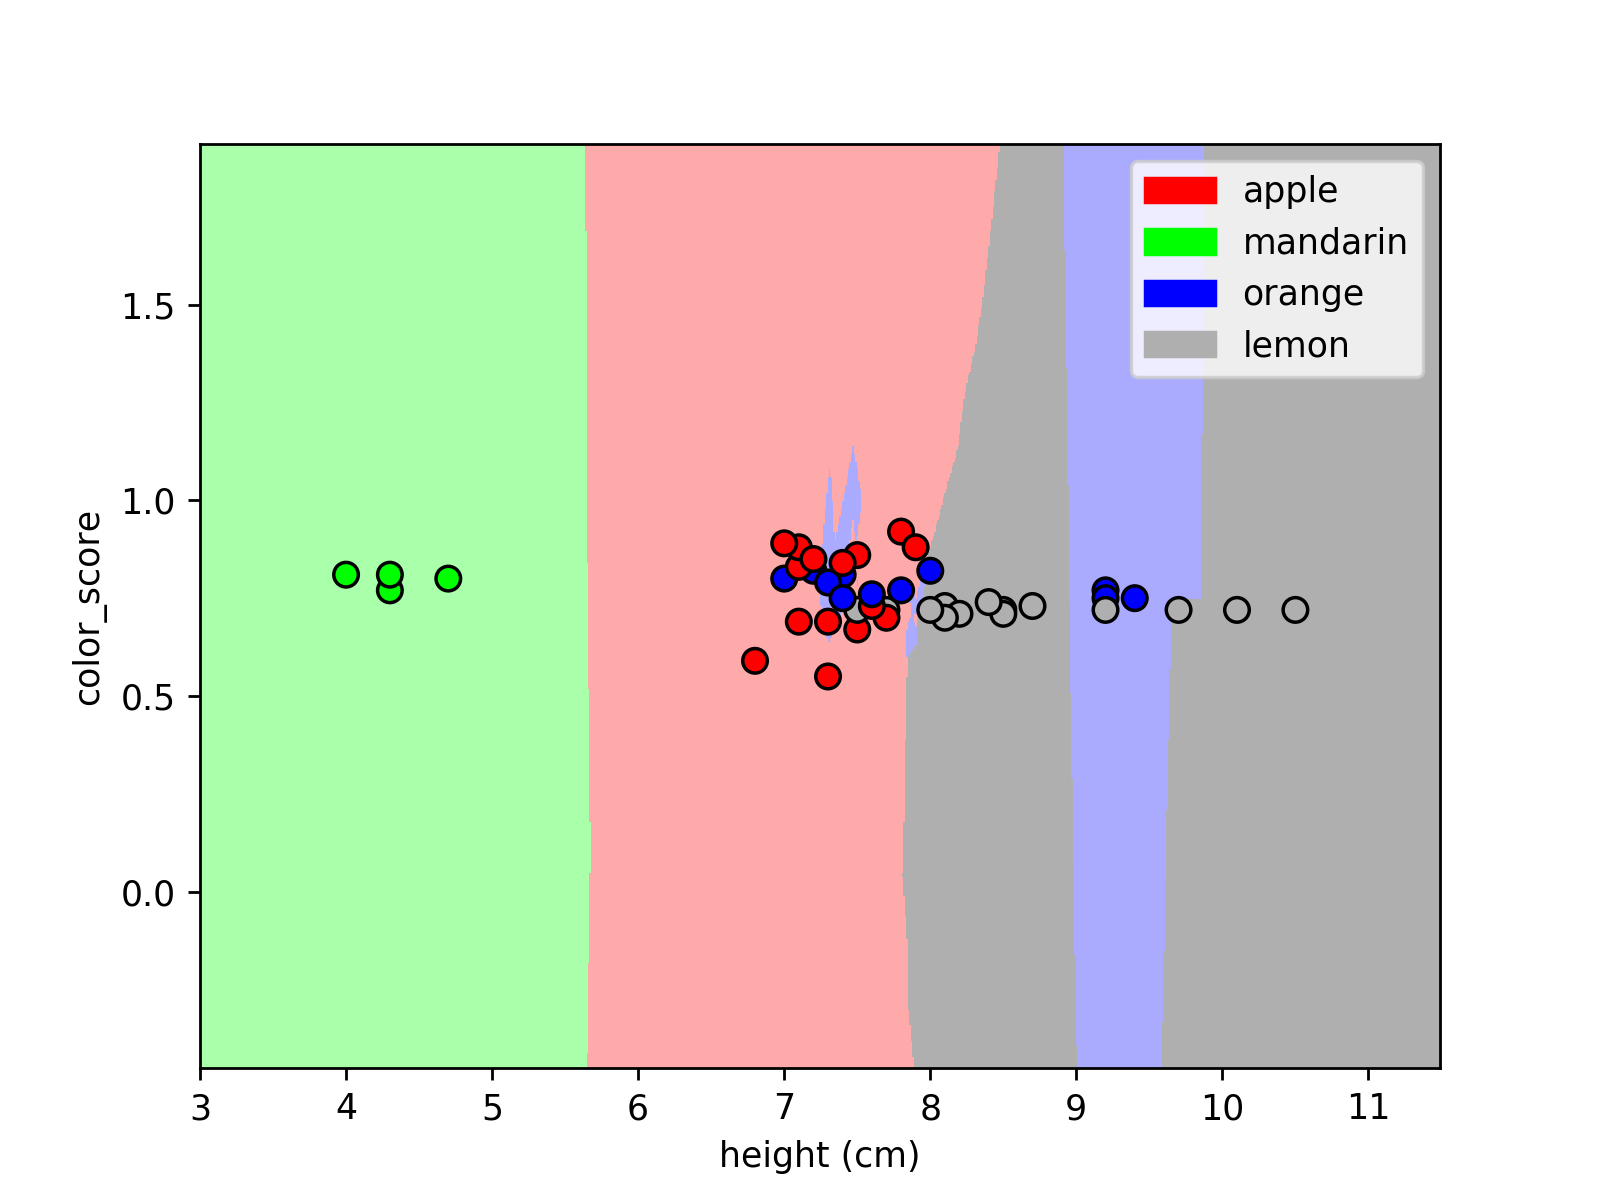

In [50]:
from sklearn import neighbors
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.patches as mpatches

def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['height', 'color_score']].as_matrix()
    y_mat = y.as_matrix()

    # Mapas de cor
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Atribuir uma cor no mapa de cores a cada ponto da malha
    
    mesh_step_size = .01
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plotar os pontos de treinamento
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])

        
    plt.xlabel('height (cm)')
    plt.ylabel('color_score')
    
    plt.show()


plot_fruit_knn(X_train, y_train, 5, 'uniform')   # 5 vizinhos

#### 12 - Quão sensível é a precisão da classificação k-NN para a escolha do parâmetro 'k'?

<IPython.core.display.Javascript object>


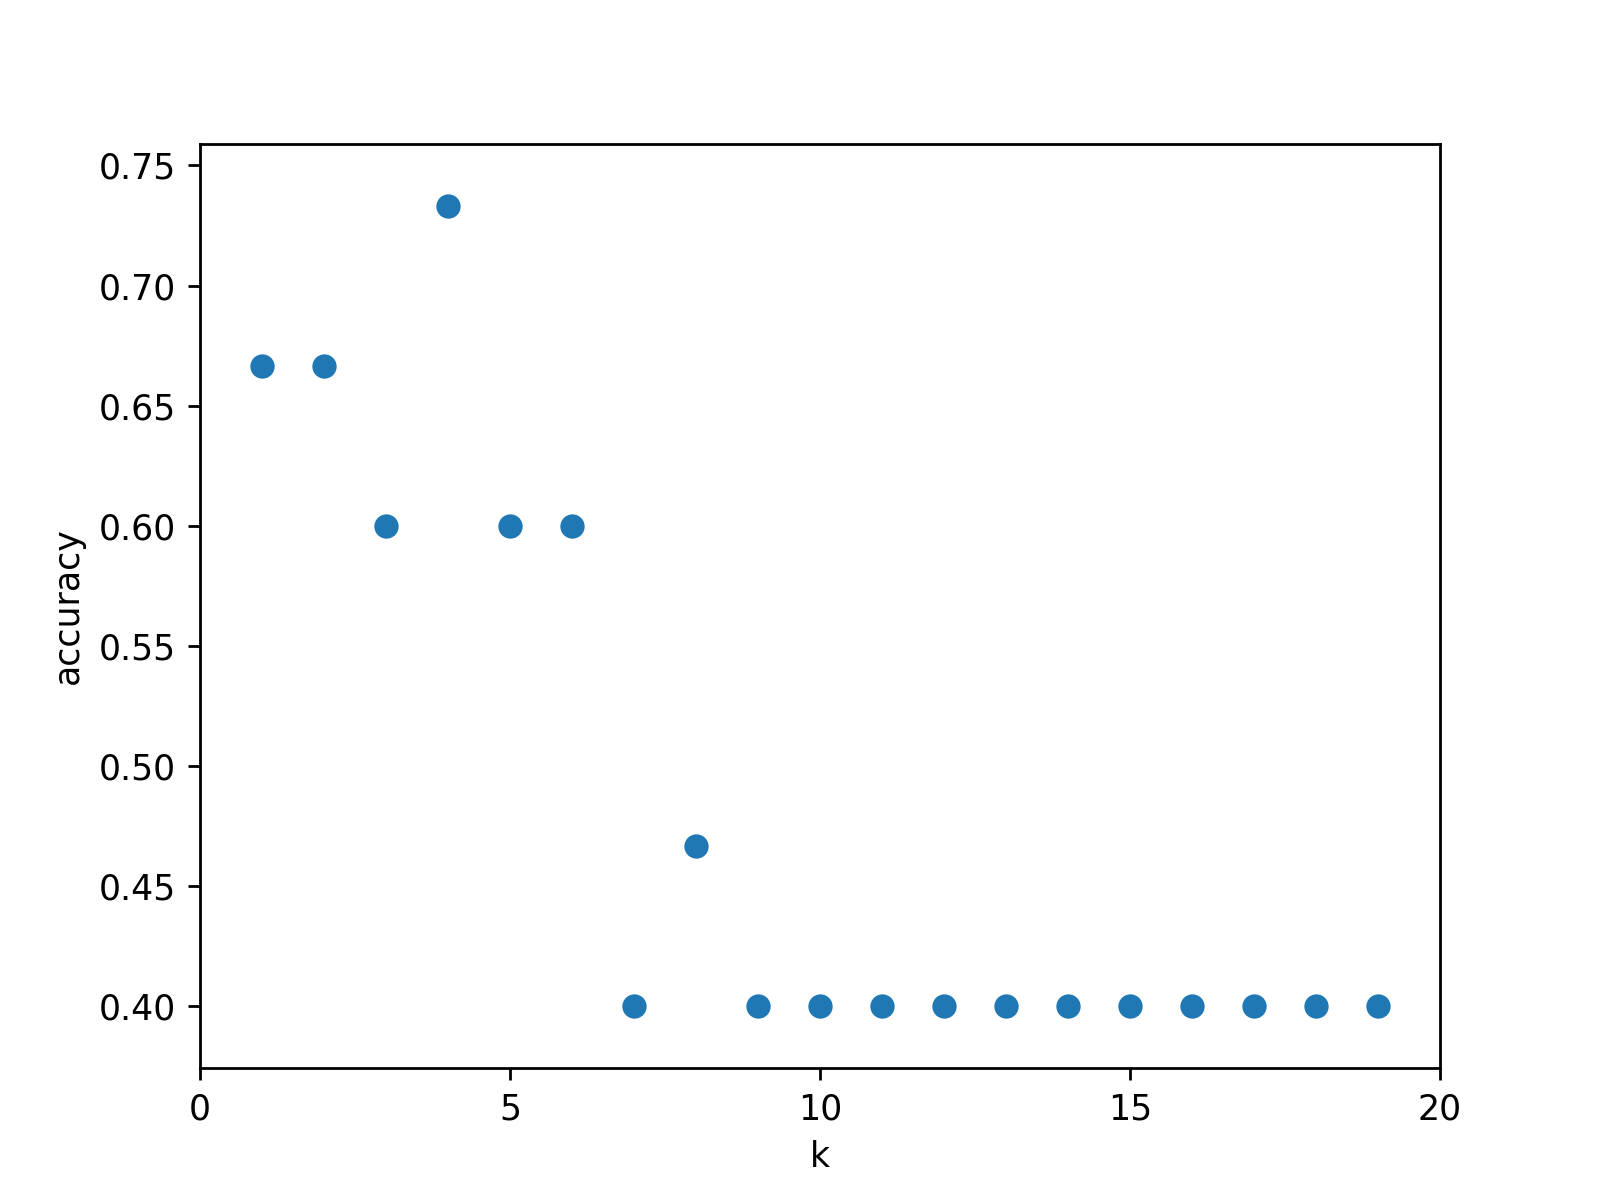

In [49]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);